<a href="https://colab.research.google.com/github/Nikerlas/AI/blob/main/AI_NeuralNetworkRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [7]:
file="concrete_data.csv"
df=pd.read_csv(file)
df.head(6)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [9]:
df.isna().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [12]:
import seaborn as sns

<Axes: >

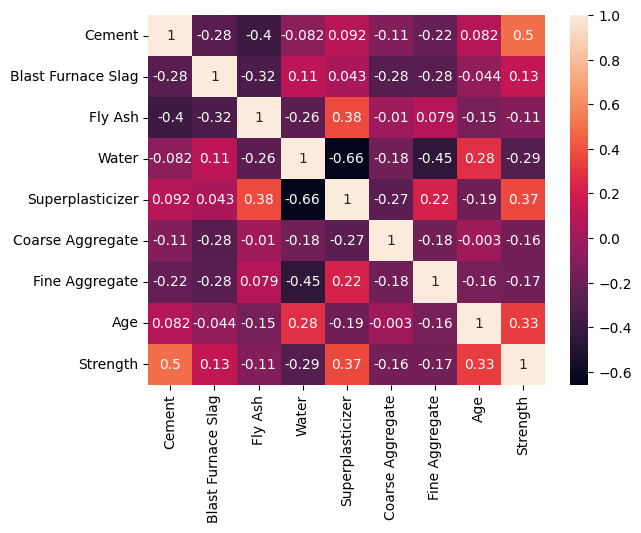

In [16]:
sns.heatmap(df.corr(), annot=True)

In [40]:
highly_correlated_x = df.corr()['Strength'].abs() > .3
highly_correlated_x = highly_correlated_x[highly_correlated_x == True].index.tolist()
highly_correlated_x.remove('Strength')
print (highly_correlated_x)

X = df[highly_correlated_x]  # Use the highly correlated features
y = df['Strength']

['Cement', 'Superplasticizer', 'Age']


In [39]:
# prompt: use sklearn for preprocessing and mplregressor

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 120.2710689969871
R-squared: 0.5332485309007673


In [38]:
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
scaler = preprocessing.StandardScaler()

num_test = 10

X_train = highly_correlated_x.[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = highly_correlated_x['Strength'][:-num_test]

X_test = highly_correlated_x.values[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = highly_correlated_x['Strength'][-num_test:]

AttributeError: 'list' object has no attribute 'data'

In [41]:
n_hidden = 20
learning_Rate = 0.1
n_iter = 2000

model = MLPRegressor(random_state=1, max_iter=n_iter, hidden_layer_sizes=n_hidden, learning_rate_init=learning_Rate)

In [42]:
model.fit(X_train, y_train.ravel())

<ipython-input-42-8c4ff6b47948>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


MLPRegressor(hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2000,
             random_state=1)

In [43]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[79.31999967 38.97670086 61.00662996 35.71834049 27.72144073 41.21612213
 26.79395396 60.62549239 35.94251355 62.119985   44.1945162  17.72478883
 56.93025685 35.38236993 25.73493709 21.75784053 43.34695148 23.30955193
 40.94832681 25.956583   34.91613235 34.49734237 50.6998141  14.22178926
 31.84581537 41.11024993 21.5481498  44.1945162  56.40320459 26.25803716
 47.84653297 46.67282036 38.1666113  59.87056251 19.50892452 40.7553526
 34.81052672 41.20485546 15.11763408 51.24314079 26.79041805 10.67102624
 37.54579918 55.63914813 21.7366349  59.17927244 59.20535881 84.51455008
 37.77216638 12.43941806 42.9720738  42.28424272 28.14129953 18.53559298
 57.62747141 35.50515626 32.14808547 23.43536637 41.01195014 32.93060185
 40.92118009 25.69886188 52.54257971 48.04722922 28.96932178 32.32539884
 38.43433657 28.40868687 41.78416709 33.29210445 22.76319166 26.22087808
 20.31679981 44.16517339 26.96316328 21.13808445 84.13446102 61.86276036
 66.48066146 15.57895369 40.94757982 41.13069019 54.

In [44]:
from sklearn.metrics import mean_squared_error


print(mean_squared_error(y_test, prediction))

155.11496034857666
